# DalitzPhaseSpace molude
The DalitzPhaseSpace class makes comprehensive description of a three-body decay kinematics. Features of this class are considered in this tutorial

We begin with some imports

In [1]:
import sys
sys.path.append("../lib/")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
plt.rc('animation', html='html5')
plt.rc('text', usetex=True)
plt.rc('font', size=18)

from DalitzPhaseSpace import DalitzPhaseSpace, phsp_edge
from PlotUtility import show_phase_space, plot_ddist, projections

%matplotlib inline

## DalitzPhaseSpace constructor
Masses of the mother particle and three final-state-particles are all that is necessary to define the phase space.

One can instantiate the DalitzPhaseSpace class providing the masses to constructor. Let's make the $D^0\to K_S^0 \pi^+ \pi^-$ decay phase space:

In [2]:
phsp0 = DalitzPhaseSpace(0.497, 0.139, 0.139, 1.865, silent=False)

Phase space M -> ABC, where
  m(M) = 1.865, m(A) = 0.497, m(B) = 0.139, m(C) = 0.139


Alternatively, one can use the `particle` package from the `scikit-hep` project

In [3]:
from particle import Particle
pi0, pip, pin, ks, d0 = [Particle.from_pdgid(pdgid) for pdgid in [111, 211, -211, 310, 421]]
'{} -> {} {} {}'.format(d0, ks, pip, pin)

'D0 -> K(S)0 pi+ pi-'

In [4]:
phsp = DalitzPhaseSpace(ks, pip, pin, d0, silent=False)

Phase space M -> ABC, where
  m(M) = 1.86483, m(A) = 0.497611, m(B) = 0.13957061, m(C) = 0.13957061


Several attributes are created in the constructor for convinience:
- Dicts for masses and masses squared

In [5]:
for key in 'ABCM':
    print('m{0} = {1:5.3f} {2}, m{0}**2 = {3:6.4f} {2}**2'.format(key, phsp.m[key], 'GeV', phsp.msq[key]))

mA = 0.498 GeV, mA**2 = 0.2476 GeV**2
mB = 0.140 GeV, mB**2 = 0.0195 GeV**2
mC = 0.140 GeV, mC**2 = 0.0195 GeV**2
mM = 1.865 GeV, mM**2 = 3.4776 GeV**2


* Ranges for the Dalitz valiables

In [6]:
for key in ['AB', 'AC', 'BC']:
    a, b = phsp.mass_sq_range[key]
    print('{:5.3f} Gev**2 < m{}2 < {:5.3f} Gev**2'.format(a, key, b))

0.406 Gev**2 < mAB2 < 2.977 Gev**2
0.406 Gev**2 < mAC2 < 2.977 Gev**2
0.078 Gev**2 < mBC2 < 1.869 Gev**2


The `DalitzPhaseSpace` class has some useful methods and members

In [7]:
[x for x in dir(phsp) if not x.startswith('__')]

['_DalitzPhaseSpace__energy',
 '_DalitzPhaseSpace__momentum',
 'cos_hel',
 'cos_hel_pq_pr',
 'energy_a',
 'energy_b',
 'energy_c',
 'energy_res',
 'grid',
 'inside',
 'm',
 'mass_sq_range',
 'momentum_a',
 'momentum_b',
 'momentum_c',
 'momentum_res',
 'mompq',
 'mr_sq_max',
 'mr_sq_min',
 'mr_sq_range',
 'msq',
 'msqLinSp',
 'msqSum',
 'other_mass',
 'other_mass_sq',
 'phsp_factor',
 'prod_mass',
 'prod_mass_sq',
 'thirdMsq',
 'thirdRt',
 'unpack_data']

Helicity angle $\theta$ is the angle between $q$ momentum of the $C$ particle and $p$ momentum of the mother particle in the $R_{BC}$ resonance frame (`Gottfried-Jackson` frame)
\begin{equation}
 \cos{\theta} = \frac{({(m_{13}^2)}_{max} - m_{13}^2) - (m_{13}^2 - {(m_{13}^2)}_{min})}{{(m_{13}^2)}_{max} - {(m_{13}^2)}_{min}}
\end{equation}

\begin{equation}
 m_{13}^2 = (m_{13}^2)_{min}\frac{1+\cos{\theta}}{2} +
            (m_{13}^2)_{max}\frac{1-\cos{\theta}}{2}
\end{equation}

## Phase space edge visulalization
Let's make the $D^0\to \pi^0\pi^+\pi^-$ phase space

In [8]:
phsp_ppp = DalitzPhaseSpace(pi0, pip, pin, d0)

`show_phase_space` function from the `PlotUtility` package visualizes the phase space edge. Let's compare our two phase spaces

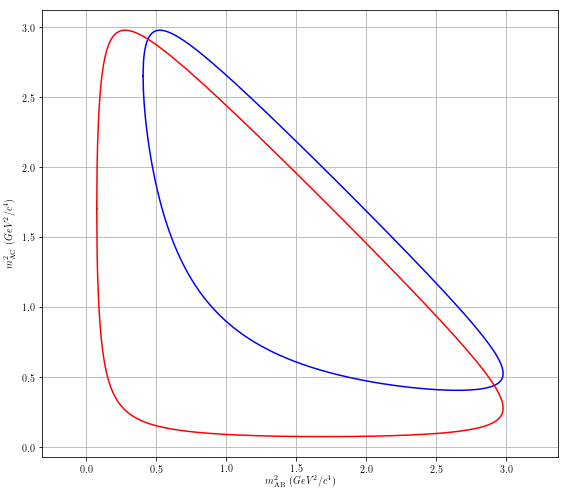

In [9]:
show_phase_space(phsp, 'AB', 'AC', 1)
show_phase_space(phsp_ppp, 'AB', 'AC', 1, 'red')
plt.grid()

## Phase space event generation
A very usefull feature of Dalitz distributions is that it is flat for a phase space decays. The `PhspGen` class can be used to generate events

In [10]:
from PhspGen import PhspGen

In [11]:
phspGen = PhspGen(phsp)
usmpl = phspGen(10**5)
mABsq, mBCsq = usmpl['AB'], usmpl['BC']

In [12]:
type(usmpl)

numpy.ndarray

In [13]:
usmpl.dtype.names

('AB', 'AC', 'BC', 'alpha', 'beta', 'eA', 'eB', 'eC', 'pA', 'pB', 'pC')

In [14]:
for key, val in zip(usmpl.dtype.names, usmpl[0]):
    print('{} = {}'.format(key, val))

AB = 2.6888424813
AC = 0.907593196964
BC = 0.167731868311
alpha = 2.21992875329
beta = 0.966945541502
eA = 0.953833799304
eB = 0.694293229708
eC = 0.216702970989
pA = [-0.40491471  0.53359952  0.46205826]
pB = [ 0.4108403  -0.42347405 -0.33829441]
pC = [-0.00592559 -0.11012547 -0.12376385]


The momenta of the final-state-particles are computed in the mother's rest frame. Actualy, `PhspGen` generates Dalitz variables. Then it calculates momenta in some frame, and the rotates the momenta using the random Euler rotation angles   `alpha` and `beta`.

All algorithms within our course assume this imput data format.

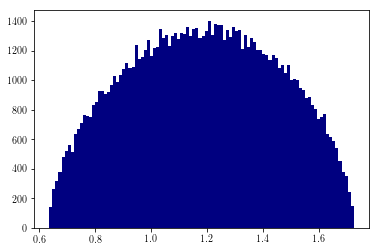

In [15]:
plt.hist(np.sqrt(mABsq), bins=100, edgecolor="none", color=["navy"]);

Or, using the `projections` tool from `PlotUtility`

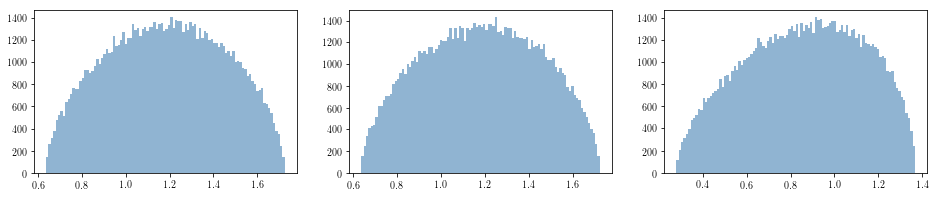

In [16]:
projections(usmpl);

In [17]:
import matplotlib.colors as colors

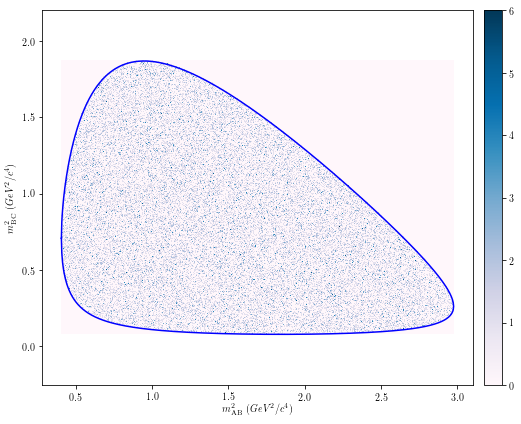

In [18]:
plot_ddist(usmpl, 'AB', 'BC', 500, 5)
show_phase_space(phsp, 'AB', 'BC', 5);

In [19]:
FIG = plt.figure(num=9, figsize=(5, 5))
XLIMS = (0, 1.05*phsp.mass_sq_range['AB'][1])
YLIMS = (0, 1.05*phsp.mass_sq_range['BC'][1])
AXES = plt.axes(xlim=XLIMS, ylim=YLIMS)
LINE, = AXES.plot([], [], lw=1, linestyle='-', color='blue')
show_phase_space(phsp, 'AB', 'BC', 9, 'red')
show_phase_space(phsp_ppp, 'AB', 'BC', 9, 'red')
plt.close()

In [20]:
def init():
    """ Init frame """
    LINE.set_data([], [])
    return LINE,

In [21]:
def animate(i):
    """ Update frame """
    x, y = 0.475, 0.135
    ma = x + (y - x) * abs(i - 100) / 100
    phsp = DalitzPhaseSpace(ma, 0.135, 0.135, 1.865)
    mr1, mr2 = phsp_edge(phsp, 'AB', 'BC')
    LINE.set_data(mr1, mr2)
    return LINE,

In [22]:
def phsp_animated(nframes=200):
    """ Make animation! """
    anim = animation.FuncAnimation(FIG, animate, init_func=init,
                                   frames=nframes, interval=20, blit=True)
    # anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
    # anim.save('basic_animation.gif', dpi=80, writer='imagemagick')
    return anim

In [23]:
phsp_animated(200)